In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Flàvia Ferrús and David Rosado

# Robust linear regression

## 1.Introduction

### 1.Implement the method proposed with gradient descent and backtracking (or a small constant $\alpha$ value).

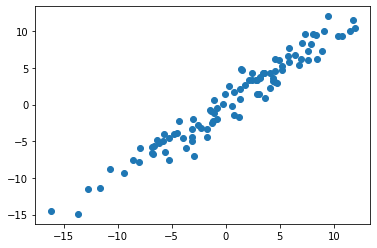

In [2]:
#Randomly generated set of points
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)
plt.scatter(points[:,0],points[:,1])

Let us define the function and its gradient

In [3]:
#Definitions of the functions we need
def Q(w0, w1):
    return (1/2) * np.sum((w0 * points[:,0] + w1 - points[:,1])**2)

def grad_Q(w0, w1):
    return np.array([np.sum((w0 * points[:,0] + w1 - points[:,1]) * points[:,0]), np.sum(w0 * points[:,0] + w1 - points[:,1])])

Let us compute the gradient descent with backtracking

In [4]:
#Gradient descent with backtracking
def gradient_descent(w0,w1,thres):
  x_0=np.zeros(2)
  x_0[0]=w0
  x_0[1]=w1
  while True:
      alpha=1
      x_k=x_0-alpha*grad_Q(x_0[0],x_0[1])
      while Q(x_k[0],x_k[1])>=Q(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0-alpha*grad_Q(x_0[0],x_0[1])
      if abs(Q(x_k[0],x_k[1]) - Q(x_0[0],x_0[1])) < thres:
        return x_k
      else:
        x_0=x_k
        
  return x_k

Let us apply the gradient descent to get the optimal parameters and plot the points and the linear regressor

The optimal parameters we obtained are: [0.97020726 0.09632354]


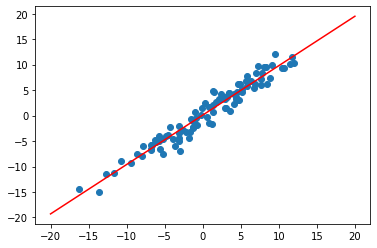

In [5]:
#Apply the method and plot the result
w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-20,20,40)
y_hat= w_opt[0]*x+w_opt[1]
plt.scatter(points[:,0],points[:,1])
plt.plot(x,y_hat,'r')

### 2. Let us now check the sensitivity of the method to outliers. Change the value of one point to a value “far away” from the set of points, for instance points[1] = [-40,20].

The optimal parameters we obtained are: [0.51952714 0.78085156]


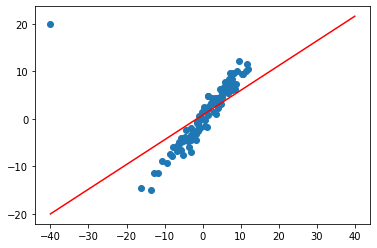

In [6]:
#We add the outlier
#Let us apply the gradient descent to get the optimal parameters and plot the points and the line regressor
points[1]=[-40,20]
w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
plt.scatter(points[:,0],points[:,1])
plt.plot(x,y_hat,'r')

We can see that adding one outlier, our linear regressor degenerates a bit. Let us see what happen if we put more outliers, for example ten

The optimal parameters we obtained are: [0.16404197 1.08827412]


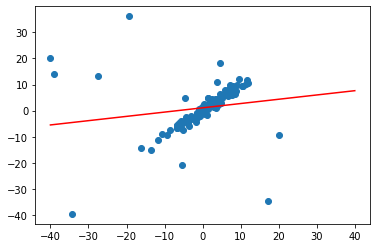

In [7]:
#We add 10 outliers and plot the result
for i in (np.random.rand(10)*100).astype(int):
    points[i] = (np.random.rand(2) - 0.5) * 80
w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
plt.scatter(points[:,0],points[:,1])
plt.plot(x,y_hat,'r')

Notice that the linear regressor is strongly influenced by the outliers presence on the data sample.

## 2. Robust functions


As we have seen previously, the least squares method (LSM) is hardly sensitive to outliers, i.e. samples that do not particularly contribute to fit the model.

Let us consider a modification of the least squares error function, which will be given as follows:
$$
Q_C = \sum_{i=1}^m \rho(e_i), 
$$
where $\rho(u)$ represents the Cauchy functions
$$
\rho(u) = \frac{c^2}{2} \text{ log } \Big[ 1+ \Big(\frac{u}{c} \Big)^2 \Big],
$$
with $c \in \mathbb{R}$. 

For the sake of simplicity, in the subsequent study we may consider $c =1$.


###1 Plot the least squares function and compare it with the Cauchy function:

In [8]:
#Definitions of the functions we need
def ls_f(u):
    return 1/2 * u**2

def cauchy_f(u, c=1):
    return c**2/2 * np.log(1 + (u/c)**2)


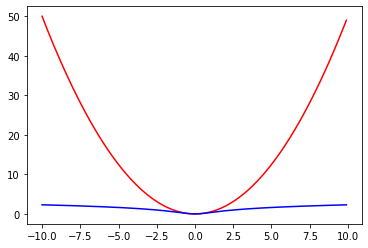

In [9]:
#Plot of the least squares functions and the Cauchy function(red/blue) respectively
x=np.arange(-10,10, 0.1)
y_ls = ls_f(x)
y_c = cauchy_f(x)

plt.plot(x, y_ls, 'r')
plt.plot(x, y_c, 'b')

Note that we are considering the corresponding error function to represent the error given between each data sample and the corresponding prediction point using the model. Therefore, it is clear that the least squares initial (in red) function penalizes hardly the points that are actually further from the prediction, i.e. the outliers. Thus, intuitivelly it is direct to see that by considering the Cauchy function (in blue) as the error function may help the model adapt better in presence of outliers. Let's see a deepest study on this topic. 

### 2. Implement the algorithm that allows to compute the parameters $w_0, w_1$ using the Cauchy function

We may consider the backtracking gradient descent method as previously, using the least squares error function:
$$
Q_c = \sum_{i=1}^m \rho(e_i) = \frac{c^2}{2}  \sum_{i=1}^m \text{ log } \Big[ 1 + \Big( \frac{\hat{y}_i - y_i}{c} \Big)^2 \Big],
$$
where $\hat{y}_i = w_0 x_i + w_1$.

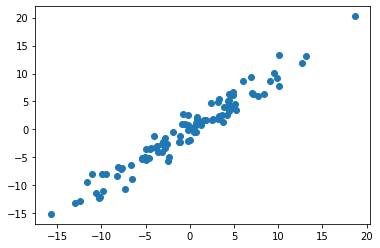

In [10]:
#Randomly generated set of points
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)
plt.scatter(points[:,0],points[:,1])

In [12]:
#Definitions of the functions we need
def Q_c(w0, w1, c=1):
    return (c**2/2) * np.sum( np.log(1 + ((w0 * points[:,0] + w1 - points[:,1])/c )**2))

def grad_Q_c(w0, w1, c=1):
    der_w0 = c**2 * np.sum( (1 +((w0 * points[:,0] + w1 - points[:,1])/c )**2 )**(-1)*(w0 * points[:,0] + w1 - points[:,1])/c  * points[:,0]/c )
    der_w1 = c**2 * np.sum( (1 +((w0 * points[:,0] + w1 - points[:,1])/c )**2 )**(-1)*(w0*points[:,0] +w1 - points[:,1])/c**2)
    return np.array([der_w0, der_w1])
                             

In [13]:
#Gradient descent method using backtracking
def gradient_descent_c(w0,w1,thres,c=1):
    x_0=np.zeros(2)
    x_0[0]=w0
    x_0[1]=w1
    while True:
        alpha=1
        x_k=x_0-alpha*grad_Q_c(x_0[0],x_0[1], c)
        while Q_c(x_k[0],x_k[1], c)>=Q_c(x_0[0],x_0[1], c):
            alpha=alpha/2
            x_k=x_0-alpha*grad_Q_c(x_0[0],x_0[1], c)
        if abs(Q_c(x_k[0],x_k[1], c) - Q_c(x_0[0],x_0[1], c)) < thres:
            return x_k
        else:
            x_0=x_k

    return x_k

In [14]:
#Plot of the points and the linear regresor. We build a function for future use
def plot_prediction(gradient_descent, points):
    w0=np.random.rand(1)
    w1=np.random.rand(1)
    w_opt = gradient_descent(w0,w1,1e-3)
    print("The optimal parameters we obtained are:", w_opt)
    x = np.linspace(-20,20,40)
    y_hat= w_opt[0]*x+w_opt[1]
    plt.scatter(points[:,0],points[:,1])
    plt.plot(x,y_hat,'r')

The optimal parameters we obtained are: [ 0.96415861 -0.04653991]


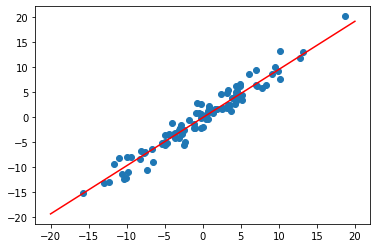

In [15]:
#Linear regression using Cauchy function
plot_prediction(gradient_descent_c, points)

### 3. Compare the results obtained with the least squares function and with the Cauchy function, assuming that there are no outliers in the dataset.

The optimal parameters we obtained are: [0.99108932 0.09808819]


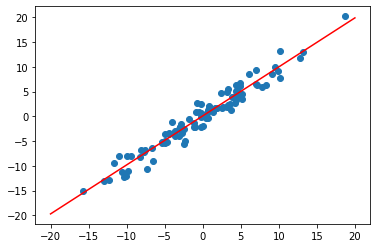

In [16]:
#Linear regression using least square function
plot_prediction(gradient_descent, points)

In [17]:
#Function that compare both methods
#Green--> Cauchy function
#red--> Least square function
def compare_plots(grad1, grad2, points):
    w0=np.random.rand(1)
    w1=np.random.rand(1)
    w_opt1 = grad1(w0,w1,1e-3)
    w_opt2 = grad2(w0,w1,1e-3)
    print("The optimal parameters we obtained with the least squares function are:", w_opt1)
    print("The optimal parameters we obtained with the Cauchy function are:", w_opt2)
    x = np.linspace(-20,20,40)
    y_hat1= w_opt1[0]*x+w_opt1[1]
    y_hat2= w_opt2[0]*x+w_opt2[1]
    plt.scatter(points[:,0],points[:,1])
    plt.plot(x,y_hat1,'r')
    plt.plot(x, y_hat2, 'g')

The optimal parameters we obtained with the least squares function are: [0.99452443 0.10965015]
The optimal parameters we obtained with the Cauchy function are: [0.9593634  0.02059212]


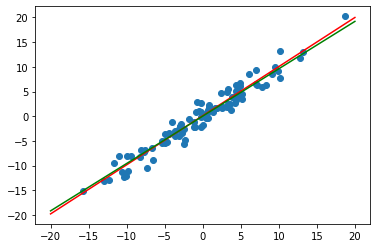

In [18]:
compare_plots(gradient_descent, gradient_descent_c, points)

In absence of outliers, boths methods give really similar linear regressors. Let's consider cases with some outliers on the data samples. 

### 4. Compare now the results with only one outlier.

In [19]:
#We add the outlier
#Let us apply the gradient descent to get the optimal parameters and plot the points and the line regressor in both cases
points[1]=[-40,20]

In [20]:
#Plot of the points and the linear regresor. We build a function for future use, now taking into account that we will have outliers
def plot_prediction(gradient_descent, points):
    w0=np.random.rand(1)
    w1=np.random.rand(1)
    w_opt = gradient_descent(w0,w1,1e-3)
    print("The optimal parameters we obtained are:", w_opt)
    x = np.linspace(-40,40,80)
    y_hat= w_opt[0]*x+w_opt[1]
    plt.scatter(points[:,0],points[:,1])
    plt.plot(x,y_hat,'r')

The optimal parameters we obtained are: [0.96019857 0.05312444]


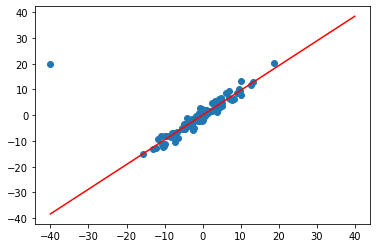

In [21]:
#Linear regression using Cauchy function
plot_prediction(gradient_descent_c, points)

The optimal parameters we obtained are: [0.56997753 0.43790342]


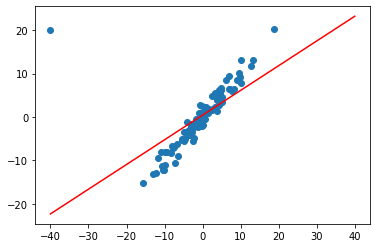

In [22]:
#Linear regression using least square function
plot_prediction(gradient_descent, points)

In [23]:
#Function that compare both methods, taking into account that we will have outliers
#Green--> Cauchy function
#red--> Least square function
def compare_plots(grad1, grad2, points):
    w0=np.random.rand(1)
    w1=np.random.rand(1)
    w_opt1 = grad1(w0,w1,1e-3)
    w_opt2 = grad2(w0,w1,1e-3)
    print("The optimal parameters we obtained with the least squares function are:", w_opt1)
    print("The optimal parameters we obtained with the Cauchy function are:", w_opt2)
    x = np.linspace(-40,40,80)
    y_hat1= w_opt1[0]*x+w_opt1[1]
    y_hat2= w_opt2[0]*x+w_opt2[1]
    plt.scatter(points[:,0],points[:,1])
    plt.plot(x,y_hat1,'r')
    plt.plot(x, y_hat2, 'g')

The optimal parameters we obtained with the least squares function are: [0.57260712 0.42635767]
The optimal parameters we obtained with the Cauchy function are: [0.96000221 0.05313161]


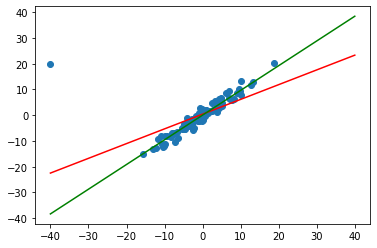

In [24]:
compare_plots(gradient_descent, gradient_descent_c, points)

It is clear that the gradient descent method using the Cauchy function is less influenciable by the presence of only one outlier in the data samples. We can say the the gradient descent method using the Cauchy function is robust in the presence of  only one outlier.

### 5. Check the results obtained with $c=1, c=100, c=1/100, c=1/1000$. 

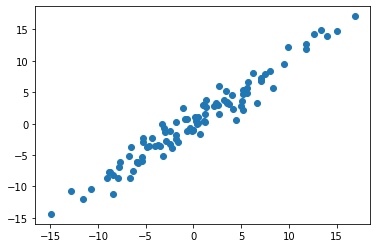

In [42]:
#Randomly generated set of points
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)
plt.scatter(points[:,0],points[:,1])

The optimal parameters for c= 1 are: [0.97910938 0.30974142] and we print it in color  r
The optimal parameters for c= 100 are: [0.96069582 0.24947414] and we print it in color  g
The optimal parameters for c= 0.01 are: [0.55049062 0.98176257] and we print it in color  k
The optimal parameters for c= 0.001 are: [0.54056    0.98229743] and we print it in color  m


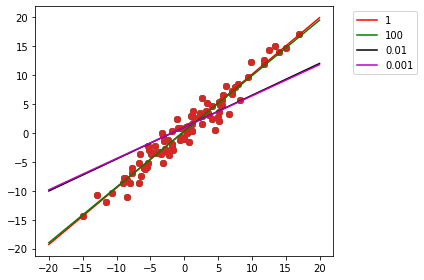

In [43]:
#Let us check the results for different values of c
c = [1, 100, 1/100, 1/1000]
colors = ['r', 'g', 'k', 'm']
w0=np.random.rand(1)
w1=np.random.rand(1)

for i in range(4):
    w_opt=gradient_descent_c(w0,w1,1e-3,c=c[i])
    print("The optimal parameters for c=",c[i],"are:", w_opt, "and we print it in color ",colors[i])
    x = np.linspace(-20,20,40)
    y_hat= w_opt[0]*x+w_opt[1]
    plt.scatter(points[:,0],points[:,1])
    plt.plot(x, y_hat, colors[i], label = c[i])
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()

  


Notice that, without introducing outliers, for small values of c, the linear regressor fits worse the points than for bigger values of c, as 1 o 100. Let us compute the  histogram of the error function |u|$= |\hat{y}_i - y_i|$ (its absolute value of u) and to compare with the shape corresponding to $\rho(u)$ functions.

We have computed the corresponding weigths for each value of $c$, we can use the corresponding $\hat{y}$ to draw the histogram of $|\hat{y}_i - y_i|$ and its Cauchy function value $\rho(\hat{y}_i - y_i)$. 

The optimal parameters for c= 1 are: [0.98073118 0.28547523] and we print it in color  b
The optimal parameters for c= 100 are: [0.96069221 0.24947412] and we print it in color  g
The optimal parameters for c= 0.01 are: [0.68140133 0.52826855] and we print it in color  k
The optimal parameters for c= 0.001 are: [0.67450291 0.52497382] and we print it in color  m


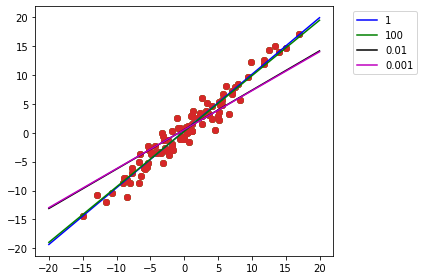

In [44]:
import altair as alt
import pandas as pd

#Let us check the results for different values of c
c = [1, 100, 1/100, 1/1000]
colors = ['b', 'g', 'k', 'm']
w0=np.random.rand(1)
w1=np.random.rand(1)

y_hat= np.zeros((4, 100))
y_hat_i = np.zeros((4, 100))


chart = alt.vconcat()
for i in range(4):
    w_opt=gradient_descent_c(w0,w1,1e-3,c=c[i])
    print("The optimal parameters for c=",c[i],"are:", w_opt, "and we print it in color ",colors[i])
    x = np.linspace(-20,20,100)
    y_hat[i]= w_opt[0]*x+w_opt[1]
    y_hat_i[i]= w_opt[0]*points[:,0]+w_opt[1]
    plt.scatter(points[:,0],points[:,1])
    plt.plot(x, y_hat[i], colors[i], label = c[i])
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()
    
    source = pd.DataFrame({
        'abs_u' : abs(y_hat_i[i] - points[:,1])
    })
    histogram = alt.Chart(source).mark_bar().encode(
        alt.X("abs_u:Q", bin = alt.Bin( step=0.5)), #bin=True),
        y='count()'
    )
    chart &= histogram

  

In [45]:
chart

/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.VConcatChart(...)

Note firstly that the absolute value follows similar distributions when we change the $c$ value. We can see a slithly difference, when we considerably decrease the value of $c$, the absolute value of the error gathers around a bias. 

Let's study now the histogram of $\rho(u)$:

In [46]:
def Q_c_general(u, c=1):
    return (c**2/2) *  np.log(1 + (u/c )**2)


u_general = np.linspace(-10,10,100)
chart2 = alt.vconcat()
for i in range(4):
    source = pd.DataFrame({
        'cauchy_u' : Q_c_general(u_general, c[i])
    })
    histogram = alt.Chart(source).mark_bar().encode(
        alt.X("cauchy_u:Q", bin=True), #bin = alt.Bin( step=0.5)), #
        y='count()'
    )
    chart2 &= histogram

In [47]:
chart2

alt.VConcatChart(...)

When representing the value of $\rho(u)$ we note that for larger values of $c$ we can distinguish a parabola describing a flatter parabola than when considering decreasing values of $c$. Note however that when we fix $c =1$, then the values are gathered around the 0 value and decrease as we get further as exponentially. 

In order to try to compare the different histograms for the Cauchy functions for different values of $c$ we may represent the histograms as a Step Chart, which in this case we may fill lightly. 

In [51]:
u_general = np.linspace(-10,10,100)
chart3 = alt.vconcat()
for i in range(4):
    source = pd.DataFrame({
        'cauchy_u' : Q_c_general(u_general, c[i])
    })
    histogram = alt.Chart(source).mark_area(
        color="lightblue",
        interpolate='step-after',
        line=True
    ).encode(
        alt.X("cauchy_u:Q", bin=True), #bin = alt.Bin( step=0.5)), #
        y='count()'
    )
    chart3 &= histogram

In [52]:
chart3

alt.VConcatChart(...)

In [59]:
u_general = np.linspace(-10,10,100)
chart4 = alt.vconcat()
source0 = pd.DataFrame(columns = ['cauchy_u', 'c_value'])
for i in range(4):
    source = pd.DataFrame({
        'cauchy_u' : Q_c_general(u_general, c[i]), 
        'c_value' : np.full((len(u_general)), c[i])
    })
    source0 = pd.concat([source0, source])
    

In [67]:
histogram = alt.Chart(source0).mark_line(
    interpolate='step-after'
).encode(
    alt.X("cauchy_u:Q", bin=True), #bin = alt.Bin( step=0.5)), #
    y='count()', 
    color = 'c_value:N'
)

In [68]:
histogram

alt.Chart(...)

Note that the order of the values computed do not match, and thus a conjunt histogram will not make it easier to visualize the differences and to observe how the parabola described by $\rho(u)$ actually flattens as we decrease the value of $c$, as expected theoretically. 

### 6.The Cauchy function is not “perfect”, and it is not robust for any number of outliers. For c=1 and c=1/100.  You should see that for a certain number of outliers, the the Cauchy function will be sensitive to the “high” number of outliers.

We study first the case c=1. We will study the linear regressor when adding 10%,33%,50%,75% of outliers. We plot two differents charts. The first one, the linear regressor computed  with the points adding the outliers and the second one, the same linear regressor, computed with the points adding the outliers, but plotting in with the original points, without outleirs, to see the degenerations of the linear regressor

The optimal parameters we obtained are: [1.01343418 0.05543583]


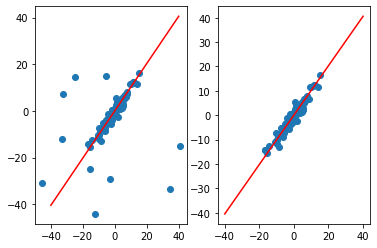

In [31]:
#We add 10 outliers(10% outliers)
c=1
points_original=points
points=np.copy(points_original)
for i in range(0,100,10):
  points[i] = (np.random.rand(2)-0.5) * 100

w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent_c(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(points[:,0],points[:,1]) 
ax1.plot(x,y_hat,'r')
ax2.scatter(points_original[:,0],points_original[:,1]) 
ax2.plot(x,y_hat,'r')


The optimal parameters we obtained are: [1.02785925 0.47665789]


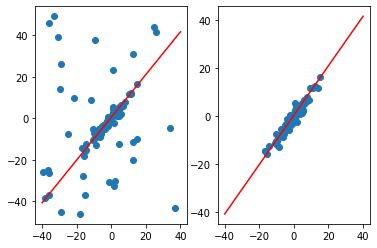

In [32]:
#We add 33 outliers(33% outliers)
c=1
points=np.copy(points_original)
for i in range(0,100,3):
  points[i] = (np.random.rand(2)-0.5) * 100

w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent_c(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(points[:,0],points[:,1]) 
ax1.plot(x,y_hat,'r')
ax2.scatter(points_original[:,0],points_original[:,1]) 
ax2.plot(x,y_hat,'r')

The optimal parameters we obtained are: [0.93561895 0.04355692]


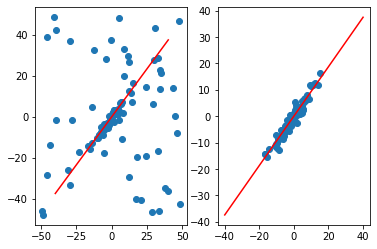

In [33]:
#We add 50 outliers(50% outliers)
c=1
points=np.copy(points_original)
for i in range(0,100,2):
  points[i] = (np.random.rand(2)-0.5) * 100

w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent_c(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(points[:,0],points[:,1]) 
ax1.plot(x,y_hat,'r')
ax2.scatter(points_original[:,0],points_original[:,1]) 
ax2.plot(x,y_hat,'r')

The optimal parameters we obtained are: [0.63148793 0.69300647]


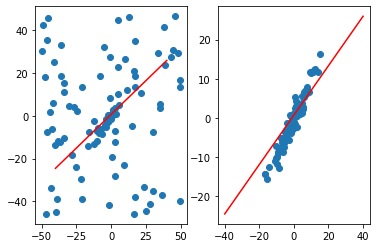

In [34]:
#We add 75 outliers(75% outliers)
c=1
for i in range(0,100):
  points[i] = (np.random.rand(2)-0.5) * 100
for i in range(0,100,4):
  points[i]=points_original[i]
w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent_c(w0,w1,1e-3)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(points[:,0],points[:,1]) 
ax1.plot(x,y_hat,'r')
ax2.scatter(points_original[:,0],points_original[:,1]) 
ax2.plot(x,y_hat,'r')

In this case, the linear regressor is robust. When the percentage of the outliers are less than the 50%, the linear regressor fits well the data. When we put 75% of outliers, the linear regressor performs really bad, but it is not surpising, we only have 25% of the points that follows a distribution, it is really difficult for the linear regressor to capt the distribution.

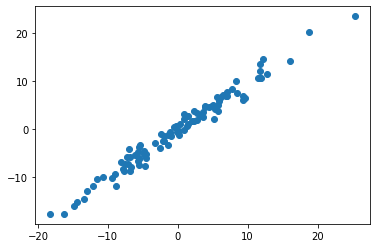

In [35]:
#Randomly generated set of points
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)
plt.scatter(points[:,0],points[:,1])

The optimal parameters we obtained are: [0.73356377 0.87815293]


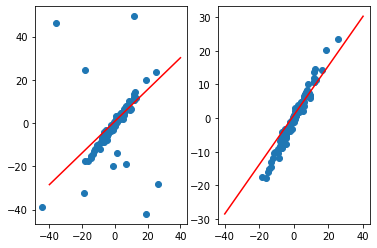

In [36]:
#We add 10 outliers(10% outliers)
c=1/100
points_original=points
points=np.copy(points_original)
for i in range(0,100,10):
  points[i] = (np.random.rand(2)-0.5) * 100

w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent_c(w0,w1,1e-3,c=1/100)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(points[:,0],points[:,1]) 
ax1.plot(x,y_hat,'r')
ax2.scatter(points_original[:,0],points_original[:,1]) 
ax2.plot(x,y_hat,'r')

The optimal parameters we obtained are: [0.41976446 0.91378975]


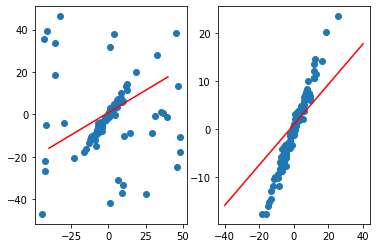

In [37]:
#We add 33 outliers(33% outliers)
c=1/100
points=np.copy(points_original)
for i in range(0,100,3):
  points[i] = (np.random.rand(2)-0.5) * 100

w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent_c(w0,w1,1e-3,c=1/100)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(points[:,0],points[:,1]) 
ax1.plot(x,y_hat,'r')
ax2.scatter(points_original[:,0],points_original[:,1]) 
ax2.plot(x,y_hat,'r')

The optimal parameters we obtained are: [0.2334141  0.13336364]


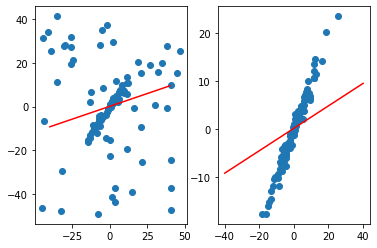

In [38]:
#We add 50 outliers(50% outliers)
c=1/100
points=np.copy(points_original)
for i in range(0,100,2):
  points[i] = (np.random.rand(2)-0.5) * 100

w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent_c(w0,w1,1e-3,c=1/100)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(points[:,0],points[:,1]) 
ax1.plot(x,y_hat,'r')
ax2.scatter(points_original[:,0],points_original[:,1]) 
ax2.plot(x,y_hat,'r')

The optimal parameters we obtained are: [0.6940462  0.76834047]


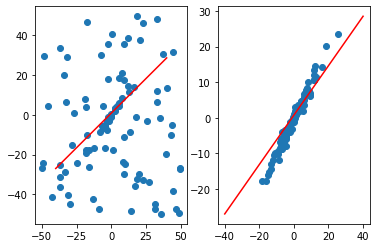

In [39]:
#We add 75 outliers(75% outliers)
c=1/100
for i in range(0,100):
  points[i] = (np.random.rand(2)-0.5) * 100
for i in range(0,100,4):
  points[i]=points_original[i]
w0=np.random.rand(1)
w1=np.random.rand(1)
w_opt = gradient_descent_c(w0,w1,1e-3,c=1/100)
print("The optimal parameters we obtained are:", w_opt)
x = np.linspace(-40,40,80)
y_hat= w_opt[0]*x+w_opt[1]
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(points[:,0],points[:,1]) 
ax1.plot(x,y_hat,'r')
ax2.scatter(points_original[:,0],points_original[:,1]) 
ax2.plot(x,y_hat,'r')

For this small value of c, the linear regressor does not fits the data even with 10% of outliers. The method is not robust in that case.